**Ensemble 6**

Members: **Kithinji Murungi, Bahati Ndwiga, Leah George, Lee Kimaita, Maureen Wangonyo, Perpetual Ann, Steven Kalungu**

Student pace: Part time

Scheduled project review date/time: 27th Aug 2023

##**Sentiment Analysis of Customer Tweets: Gaining Competitive Insights for Google and Apple Products**
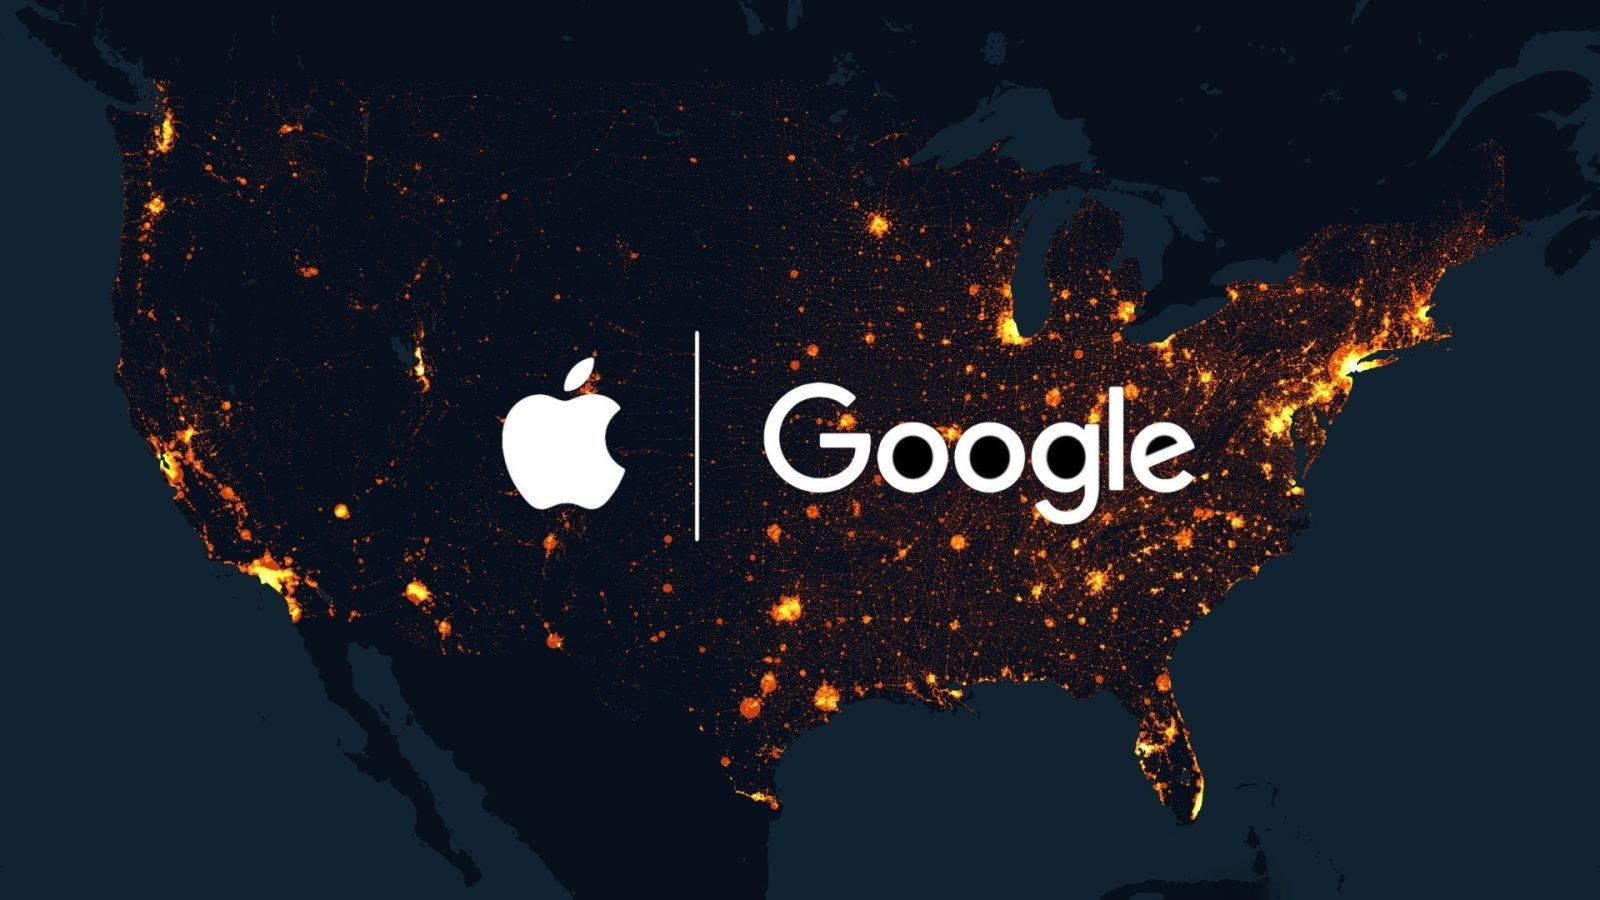

# 1. Business Undersstanding

## 1.0 Background

Ensemble Africa is an independent consultancy firm that has been contacted by Google to carry out an analysis on customers' sentiments expressed in tweets by one of its major product competitor.
Google, a leading technology company, aims to gain insights into their competitor, Apple, by analyzing customers' sentiments expressed in tweets.

The goal of this project is to develop a sentiment analysis model that accurately rates the sentiments of tweets about Apple products. By understanding the sentiments of customers' experiences, Google intends to gain a competitive advantage by identifying areas where they can improve their products or services, thereby enhancing customer satisfaction and loyalty.

The project has taken cognizance the adoption of exploratory data analysis. From the available data, we have undertaken to cleaning and using descriptive analysis we intend to provide resourceful explanatory analytics that Google can use to gain competitive advantage over Apple inc.

## 1.1 Objectives

1. *Sentiment Analysis Model:* Develop a robust machine learning model that can accurately analyze the sentiment of tweets related to Apple products. The model should classify each tweet into categories such as positive, neutral, or negative sentiments based on the content.

2. *Data Collection and Preprocessing:* Collect a comprehensive dataset of tweets mentioning Apple products. Preprocess the data to remove noise, perform tokenization, and handle special characters and stop words.

3. *Model Training and Validation:* Train the sentiment analysis model on the preprocessed dataset using appropriate machine learning algorithms. Validate the model's performance using various evaluation metrics, such as accuracy, precision, recall, and F1-score.

4. *Fine-tuning and Optimization:* Fine-tune the model's hyperparameters and architecture to achieve the best possible performance. Consider using techniques like grid search or random search for optimization.

5. *Real-time Sentiment Analysis:* Develop a user-friendly interface or API that allows users to input a tweet and receive the sentiment rating. The model should be able to process tweets in real time and provide prompt sentiment predictions.

6. *Competitor Analysis:* Analyze the sentiment distribution across different Apple products and features. Identify trends and patterns that can provide valuable insights into customer preferences and concerns.

7. *Model Integration:* Integrate the sentiment analysis model into Google's internal analytics and decision-making processes. Provide easy-to-understand visualizations and reports showcasing the sentiments of Apple-related tweets.

Objectives:

Build an NLP model that can rate the sentiment of a Tweet based on its content.

Evaluate the model's performance and identify areas for improvement.

Use the model to gain insights into public opinion about Apple and Google products.

## 1.2 Stakeholders

## 1.3 Hypothesis

Null Hypothesis (H0): There is no significant difference in sentiment scores across different company products.

Alternative Hypothesis (Ha): There is a significant difference in sentiment scores across different company products.



Hypothesis:

Alternative Hypothesis (H0): We can build a model to accurately classify setiment of tweets between Google and Apple products

Null Hypothesis (Ha): We cannot build a model to accurately classify setiment of tweets between Google and Apple products


We hypothesize that we can build a model that can accurately classify the sentiment of Tweets about Apple and Google products. We believe that this model will be useful for stakeholders who need to understand public opinion about these products.

# 2. Data Understanding

The dataset used in this project,sourced from https://data.world/crowdflower/brands-and-product-emotions, consists of 3 columns and 9093 rows. The columns include;


*   tweet_text : contains the text of tweets.
*   emotion_in_tweet_is_directed_at : column provides insights into the emotions expressed.
*   is_there_an_emotion_directed_at_a_brand_or_product : indicates the brand/product the emotion is directed at.


### 2.1 Import Libraries

In [ ]:
# !python -m spacy download en

In [ ]:
# !pip install torchtext

In [ ]:
import pandas as pd
import numpy as np
import warnings
import random as rnd
import nltk
# import emojis


import re
import string
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go

import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm



warnings.filterwarnings("ignore")


pd.set_option('display.max_columns', None)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)
pd.set_option('display.max_colwidth', None)

### 2.2 Load dataset

In [ ]:

#file_path = "/tweet_product_company.csv"

tweets = pd.read_csv('tweet_product_company.csv', encoding='ISO-8859-1')
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,".@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead! I need to upgrade. Plugin stations at #SXSW.",iPhone,Negative emotion
1,"@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw,iPad or iPhone App,Negative emotion
4,"@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",Google,Positive emotion


In [ ]:
tweets.tail()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your regularly scheduled #sxsw geek programming with big news {link} #google #circles",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported potential AE. Yet FDA relies on physicians. &quot;We're operating w/out data.&quot; #sxsw #health2dev",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their time fell back an hour this weekend. Of course they were the New Yorkers who attended #SXSW.,NaN,No emotion toward brand or product
9092,Ï¡Ïàü_ÊÎÒ£Áââ_£â_ÛâRT @mention Google Tests ÛÏCheck-in OffersÛ At #SXSW {link},NaN,No emotion toward brand or product


In [ ]:
def data_understanding(tweets):
    # Shape of the dataset
    display(f"The shape of the dataset is: {tweets.shape}")
    print('*'*69)

    # Basic info abt the dataframe
    tweets.info()
    print('*'*69)

    # Value count in the target column
    emotion_count = tweets['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
    print(emotion_count)
    print('*'*69)

    # Check for Null
    print("\nNull Values")
    display(tweets.isnull().sum())
    print('*'*69)

    # Columns present
    print("\nAvailable columns")
    display(tweets.columns)

    display(tweets.describe())

data_understanding(tweets)

'The shape of the dataset is: (9093, 3)'

*********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
*********************************************************************
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64
*********************************************************************

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

*********************************************************************

Available columns


Index(['tweet_text', 'emotion_in_tweet_is_directed_at',
       'is_there_an_emotion_directed_at_a_brand_or_product'],
      dtype='object')

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,iPad,No emotion toward brand or product
freq,5,946,5389


#### Observations

> Tweets are divided into 3: Positive, Negative, I can't tell. Meaning its a multiclass</br> There is a significant amount of Null values in the emotion_in_tweet_is_directed_at(around 5802)

# 3. Data Cleaning and Preparation

In [ ]:
# Rename the columns
tweets.rename(columns={'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiments'}, inplace=True)
tweets.rename(columns={'emotion_in_tweet_is_directed_at': 'brand'}, inplace=True)
tweets.rename(columns={'tweet_text': 'tweet'}, inplace=True)

In [ ]:
# Check for duplicate rows based on "tweet_text"
duplicates = tweets[tweets.duplicated(subset='tweet', keep=False)]

# Display the duplicate rows
print("Total Number of Duplicate Rows:", len(duplicates))
print("Duplicate Rows:")
print(duplicates)

Total Number of Duplicate Rows: 46
Duplicate Rows:
                                                                                                                                                 tweet  \
7           #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan   
9                                                             Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear   
17                    I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone   
20                                          Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?   
21                     Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!   
24    Really enjoying the

In [ ]:
#drop the duplicates
tweets_df = tweets.drop_duplicates(subset='tweet')
tweets_df.shape

(9066, 3)

In [ ]:
# lowercase all characters
tweets_df['tweet'] =tweets_df['tweet'].str.lower()
tweets_df['brand'] = tweets_df['brand'].str.lower()
tweets_df['sentiments'] = tweets_df['sentiments'].str.lower()

In [ ]:
tweets_df.sample(10)

,tweet,brand,sentiments
7016,"tip for conference goers everywhere: bring ipad, leave laptop at hotel. i've had no battery and a sore shoulder all week! #sxsw",ipad,positive emotion
5784,rt @mention going to #sxsw? join google &amp; youtube for special events &amp; more: {link} #google ...,NaN,no emotion toward brand or product
5505,"rt @mention at #sxsw social hackathon session with google, bing, webtrends and chzbrgr. going to figure out how to do this in mpls/st paul #bolinsxsw",NaN,no emotion toward brand or product
3346,&gt;&gt; google tests ûïcheck-in offersû at sxsw: {link} #sxsw,NaN,no emotion toward brand or product
1382,"tristan h, apture: being fast &amp; iterative w your news content means google finds you first. #sxsw #hacknews #drumbeat #mojo",NaN,no emotion toward brand or product
69,check out @mention @mention &amp; @mention in line for their ipad 2 in austin. power to them! #sxswi #sxsw {link},ipad,positive emotion
9008,i'm pretty sure the panelist that thinks &quot;apple is drowning in their success&quot; is fucking insane. #sxsw,apple,negative emotion
1068,@mention saw u r going to #sxsw. dwnld #groundlink app &amp; ride for $10 in austin during sxswi{link} see us booth 437,NaN,no emotion toward brand or product
3880,@mention is there already a line for the ipad 2's that just arrived? #sxsw,NaN,no emotion toward brand or product
5429,rt @mention apple is opening a pop-up store in austin for #sxsw (aapl) {link},NaN,no emotion toward brand or product


#### <b> Handling Null

In [ ]:
 #viewing null values
 tweets_df.isnull().sum()

tweet            1
brand         5786
sentiments       0
dtype: int64

####Tweet column

In [ ]:
#view the tweet column with null value
tweets_df[tweets_df['tweet'].isnull()]

,tweet,brand,sentiments
6,NaN,NaN,no emotion toward brand or product


In [ ]:
# drop the tweet column with no tweet as it tells no info
tweets_df = tweets_df.dropna(subset=['tweet'])

In [ ]:
tweets_df.isnull().sum()

tweet            0
brand         5785
sentiments       0
dtype: int64

#### Brand Column

In [ ]:
null_values = tweets_df[tweets_df['brand'].isnull()]
null_values.sample(8)

,tweet,brand,sentiments
901,having so much fun handing out chances to win 2 audi cars with @mention #sxsw (@mention apple store sxsw) {link},NaN,no emotion toward brand or product
4488,"ipad2 launch at apple pop-up store in austin, texas for #sxsw {link}",NaN,no emotion toward brand or product
2685,"btw, these live-tweets are coming from marissa mayer's presentation at #sxsw. mayer is the vp of consumer products at @mention ^jr",NaN,no emotion toward brand or product
2291,@mention brian - actually austin doesn't have an apple store but there is a rumor they built a pop up one {link} for #sxsw,NaN,no emotion toward brand or product
4357,the only more fitting than @mention having his birthday during #sxsw is if apple released a new product today too. happy birthday!,NaN,no emotion toward brand or product
7121,packing for #sxsw. literally going w/ 2 tshirts + ipad. dont plan on doing much but enjoying the sun &amp; conversing with dorks.,NaN,no emotion toward brand or product
6693,rt @mention style x &amp; @mention - brethren #sxsw pop-ups! ://m.theatlantic.com/technology/archive/2011/03/apple-sets-up-temporary-megastore-at-sxsw/72296/,NaN,no emotion toward brand or product
8075,now discussing pubsubhubbub: {link} #fsw #sxsw,NaN,no emotion toward brand or product


In [ ]:
# The brand column has many null. Lets handle that

keywords = ['google', 'apple', 'ipad', 'android', 'iphone']

def find_brand(text):
    if isinstance(text, str):
        lower_text = text.lower()
        for keyword in keywords:
            if keyword in lower_text:
                return keyword
    return None

tweets_df['brand'] = tweets_df.apply(lambda row: row['brand'] if not pd.isna(row['brand']) else find_brand(row['tweet']), axis=1)

In [ ]:
# check how many Null are remaining
tweets_df.isnull().sum()

tweet           0
brand         759
sentiments      0
dtype: int64

In [ ]:
# view rows in brand column that have null values (NaN)
rows_with_nan_brand= tweets_df[pd.isna(tweets_df['brand'])]
rows_with_nan_brand.sample(15)

,tweet,brand,sentiments
6668,rt @mention so awesome! rt @mention knitted staircase in attendance at #sxsw party tomo 7pm hosted by @mention &amp; @mention {link},None,no emotion toward brand or product
5538,rt @mention awesome presentation on digital magazines {link} #touchingstories #sxsw #gsdm,None,no emotion toward brand or product
8366,last minute venue change for #eecms #sxsw meetup at noon: pecan st. cafe: {link} trinity and 6thish,None,no emotion toward brand or product
617,pumped to hear @mention dudes talk about logos over the years. can i make one? #sxsw #gsdm,None,no emotion toward brand or product
3989,c23: check the head {link} [codes valid: 12:00-3:59:59p 03/13/11] #infektd #sxsw #cvdc,None,no emotion toward brand or product
2685,"btw, these live-tweets are coming from marissa mayer's presentation at #sxsw. mayer is the vp of consumer products at @mention ^jr",None,no emotion toward brand or product
8556,#gowalla to launch &quot;groupon or living social-type&quot; rewards at #sxsw {link},None,no emotion toward brand or product
1033,"if you're racing around #sxsw, you best be fueling up with great local fare\n#eatshopaustinapp {link}",None,no emotion toward brand or product
2312,#cloud #vc this post has nothing to do with #sxsw: 2x startup founder &amp; ceo who has gone to the dark side o... {link} #tcn,None,no emotion toward brand or product
7252,"another pov from #sxsw: &quot;the future of reading online is customization &amp; sharing, not tablets (yet)&quot; | fast company - {link}",None,no emotion toward brand or product


In [ ]:
# Since they can't be tagged to any brand we label them Unknown
tweets_df['brand'] = tweets_df['brand'].fillna('unknown')

In [ ]:
tweets_df.isnull().sum()

tweet         0
brand         0
sentiments    0
dtype: int64

In [ ]:
#view the unique values in brand column
tweets_df.brand.unique()

array(['iphone', 'ipad or iphone app', 'ipad', 'google', 'android',
       'apple', 'android app', 'other google product or service',
       'unknown', 'other apple product or service'], dtype=object)

#### Sentiments column

In [ ]:
tweets_df['sentiments'].value_counts()

no emotion toward brand or product    5372
positive emotion                      2968
negative emotion                       569
i can't tell                           156
Name: sentiments, dtype: int64

In [ ]:
# Understanding the 'I can't tell' sentiments
unknown_sentiments = tweets_df[tweets_df['sentiments'] == "i can't tell"]
unknown_sentiments.sample(9)

,tweet,brand,sentiments
4310,dang rt @mention confirmed! apple store 2 week popup in austin for #sxsw {link} (via @mention who gave us no credit! ),apple,i can't tell
4086,lol. #apple erects temporary apple store in #austin for #sxsw to sell #ipad 2. {link},apple,i can't tell
1558,google's @mention &quot;credit card cos. know with 98% accuracy 2 yrs before that you're going to get divorced&quot; {link} #sxsw,google,i can't tell
4915,the hive of innovation but yet every booth at the #sxsw trade show had the exact same promotional idea: ipad 2 raffle!,ipad,i can't tell
3939,i would give my apple stock to be more like @mention {link} #sxsw,apple,i can't tell
7570,google circles - looking forward to this. sadly no launch at #sxsw,google,i can't tell
8702,in case our rabbits forgot theirs at home! apple opening pop-up store in austin for #sxsw {link},apple,i can't tell
5662,"rt @mention demo of google hotpot at #bettersearch panel: still pull search, but personalized. not yet serendipitous? #sxsw",google,i can't tell
3058,google doesn't place any value on your domain extension. they are all equal. #sxsw #qagb,google,i can't tell


We decided to drop the 'I can't tell' because we wanted to classify the sentiments in 'positive' , 'negative' and 'no emotion' as this will help us enhance the quality of our analysis.

In [ ]:
# Drop the columns containing "i can't tell"
tweets_df = tweets_df[tweets_df['sentiments'] != "i can't tell"]

In [ ]:
tweets_df['sentiments'].value_counts()

no emotion toward brand or product    5372
positive emotion                      2968
negative emotion                       569
Name: sentiments, dtype: int64

In [ ]:
#Hashtags
def hashtag_count(string):
    # Split the string into words
    words = string.split()
    # Create a list of hashtags
    hashtags = [word for word in words if word.startswith('#')]
    # Return list of hashtags
    return hashtags


In [ ]:
   hasht = []

# Loop through each row in the "tweet" column
for index, row in tweets_df.iterrows():
    tweet = row['tweet']
    hashtags = hashtag_count(tweet)  # Get list of hashtags
    hasht.extend(hashtags)  # Extend the list with hashtags from the current tweet

In [ ]:
pd.Series(hasht).value_counts().head(20)


#sxsw          7672
#sxsw.          406
#apple          396
#sxswi          298
#google         297
#ipad2          275
#iphone         255
#ipad           249
#sxsw?          189
#sxsw,          168
#sxsw:          143
#sxsw!          129
#android        119
#austin          96
#tech            87
#circles         78
#sxswû         69
#ubersocial      68
#gsdm            62
#tapworthy       52
dtype: int64

##*EDA*


###1. Univariate

<Axes: xlabel='tweet', ylabel='Count'>

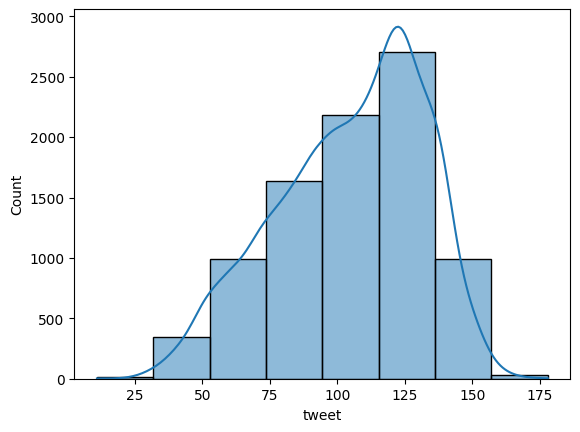

In [ ]:
# distribution of text: sentense length analysis
sns.histplot(tweets_df['tweet'].str.len(), bins=8, kde=True)

The distribution of the texts seem to be left skewed
From above histogram, the tweets are comprised of around 29-160 characters

<Axes: xlabel='sentiments', ylabel='count'>

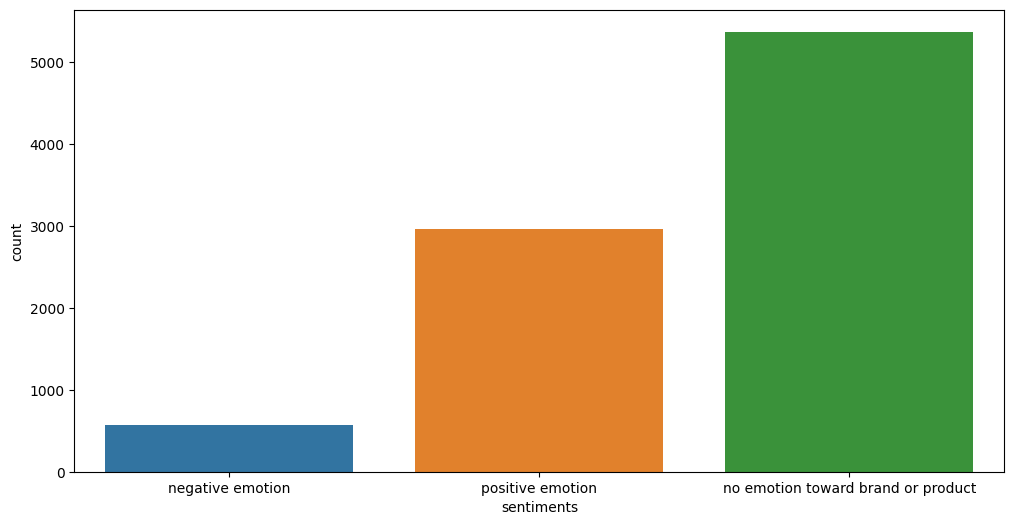

In [ ]:
#A plot that shows the distribution of customer sentiments
plt.figure(figsize=(12,6))
sns.countplot(x='sentiments',data=tweets_df)

In [ ]:
temp = tweets_df['sentiments'].value_counts().reset_index()
temp.columns = ['sentiments', 'tweet']

fig = go.Figure(go.Funnelarea(
    text=temp.sentiments,
    values=temp.tweet,
    title={"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
))

# Set the width and height of the figure
fig.update_layout(width=700, height=500)

fig.show()

#### 2.Bivariate Analysis

Sentiment vs. Product
To analyze how sentiment (positive, negative, neutral) varies across different products (Apple, Google) mentioned in the tweets. This can help you understand how customers perceive each company's products.

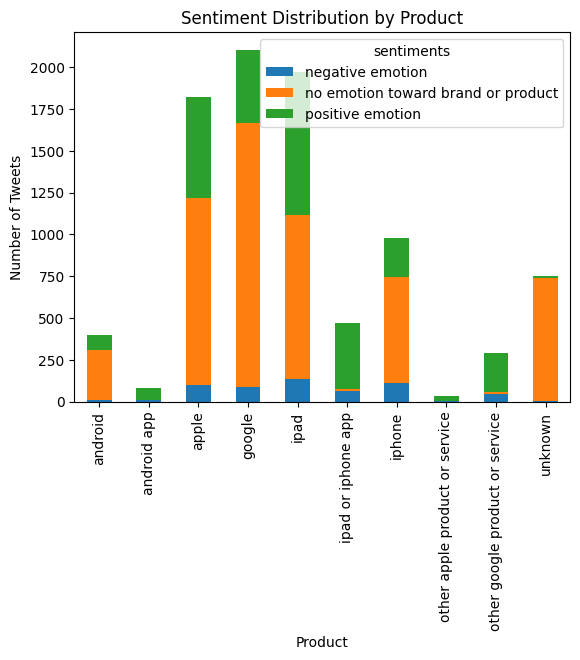

In [ ]:
product_column = 'brand'
sentiment_column = 'sentiments'

# Group the data by product and sentiment, and calculate the counts
sentiment_counts = tweets_df.groupby([product_column, sentiment_column]).size().unstack()

# Plot the sentiment distribution for each product
sentiment_counts.plot(kind='bar', stacked=True)
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Tweets')
plt.show()

From the visualiatin above, the product that recieved most tweets is google. The common trend is that most customers don't hold any emotion towards the product.

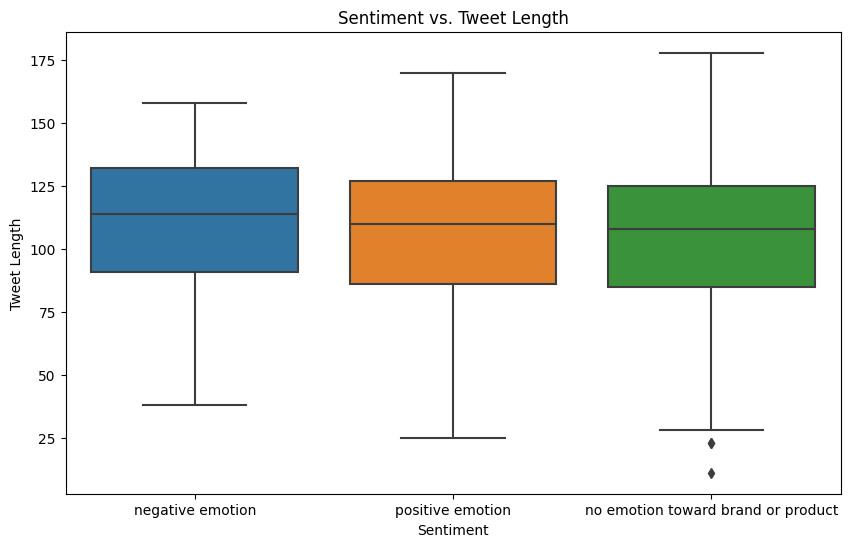

In [ ]:
sentiment_column = 'sentiments'
tweet_column = 'tweet'

# Calculate the length of each tweet
tweets_df['tweet_length'] = tweets_df[tweet_column].apply(lambda x: len(str(x)))

# Plot a box plot to visualize tweet length by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x=sentiment_column, y='tweet_length', data=tweets_df)
plt.title('Sentiment vs. Tweet Length')
plt.xlabel('Sentiment')
plt.ylabel('Tweet Length')
plt.show()

From the box plots, we notice that most of the tweets whose lengths are longer hold negative sentiments. Also, the margine between the three sentiments is not too far apart. Therefore, it is safe to say that the length of the tweets is not enough to conclude on the customers' sentiments

## <b> Feature engineering

#### Brand column

In [ ]:
#mapping products to brands
dict_ = {'google': 'google',
        'ipad' : 'apple',
        'apple' : 'apple',
        'iphone' : 'apple',
        'unknown' : 'unknown',
        'ipad or iphone app': 'apple',
        'android' : 'google',
        'other google product or service' : 'google',
        'android app' : 'google',
        'other apple product or service' : 'apple'
        }

tweets_df['brand'] = tweets_df['brand'].map(dict_)

In [ ]:
tweets_df['brand'].value_counts(normalize = True)

apple      0.592659
google     0.322820
unknown    0.084521
Name: brand, dtype: float64

#### Emotion column

In [ ]:
emotion_dict = {
    'no emotion toward brand or product': 'neutral',
    'positive emotion': 'positive',
    'negative emotion': 'negative',
}

tweets_df['sentiments'] = tweets_df['sentiments'].map(emotion_dict).fillna("i can't tell")


In [ ]:
tweets_df['sentiments'].value_counts()

neutral     5372
positive    2968
negative     569
Name: sentiments, dtype: int64

In [ ]:
tweets_df.sample(10)

,tweet,brand,sentiments,tweet_length
8845,whatûªs new with blogger {link} #blogging #blogger #google #sxsw,google,neutral,65
1909,evidence against nfc in the iphone 5 via @mention {link} #checkins #sxsw cc: @mention,apple,neutral,85
7012,"#sxsw iphone tip, turn off 3g to get good service/data",apple,neutral,54
3353,whoohoo! got it! ;) rt @mention new #ubersocial for #iphone now in the app store includes uberguide to #sxsw (cont) {link},apple,positive,122
3687,a #sxsw find... love @mention #sxswi {link} #itunes,unknown,neutral,51
6483,"rt @mention rt @mention @mention to launch major new social network called #circles, possibly today! {link} #sxsw #smm &gt;&gt;really google? now?",google,negative,147
5464,rt @mention apple set to open popup shop in core of sxsw action - they're going to sell ipad2 at #sxsw! {link} // danger,apple,neutral,121
924,there are no hard feelings towards google. @mention says they would make a great partner. #checkins #sxsw #pnid,google,positive,111
4410,mike tyson appears at #sxsw to promote iphone/ipad game {link} #seo #sem #games #miketyson #topnews,apple,neutral,99
3458,about to hear marissa mayer from google speak. 3 rows back. so cool! #sxsw #google,google,positive,82


## Pre-processing for NLP

#### (a) <b> Tokenization, Stemmer, and Stopwords Objects

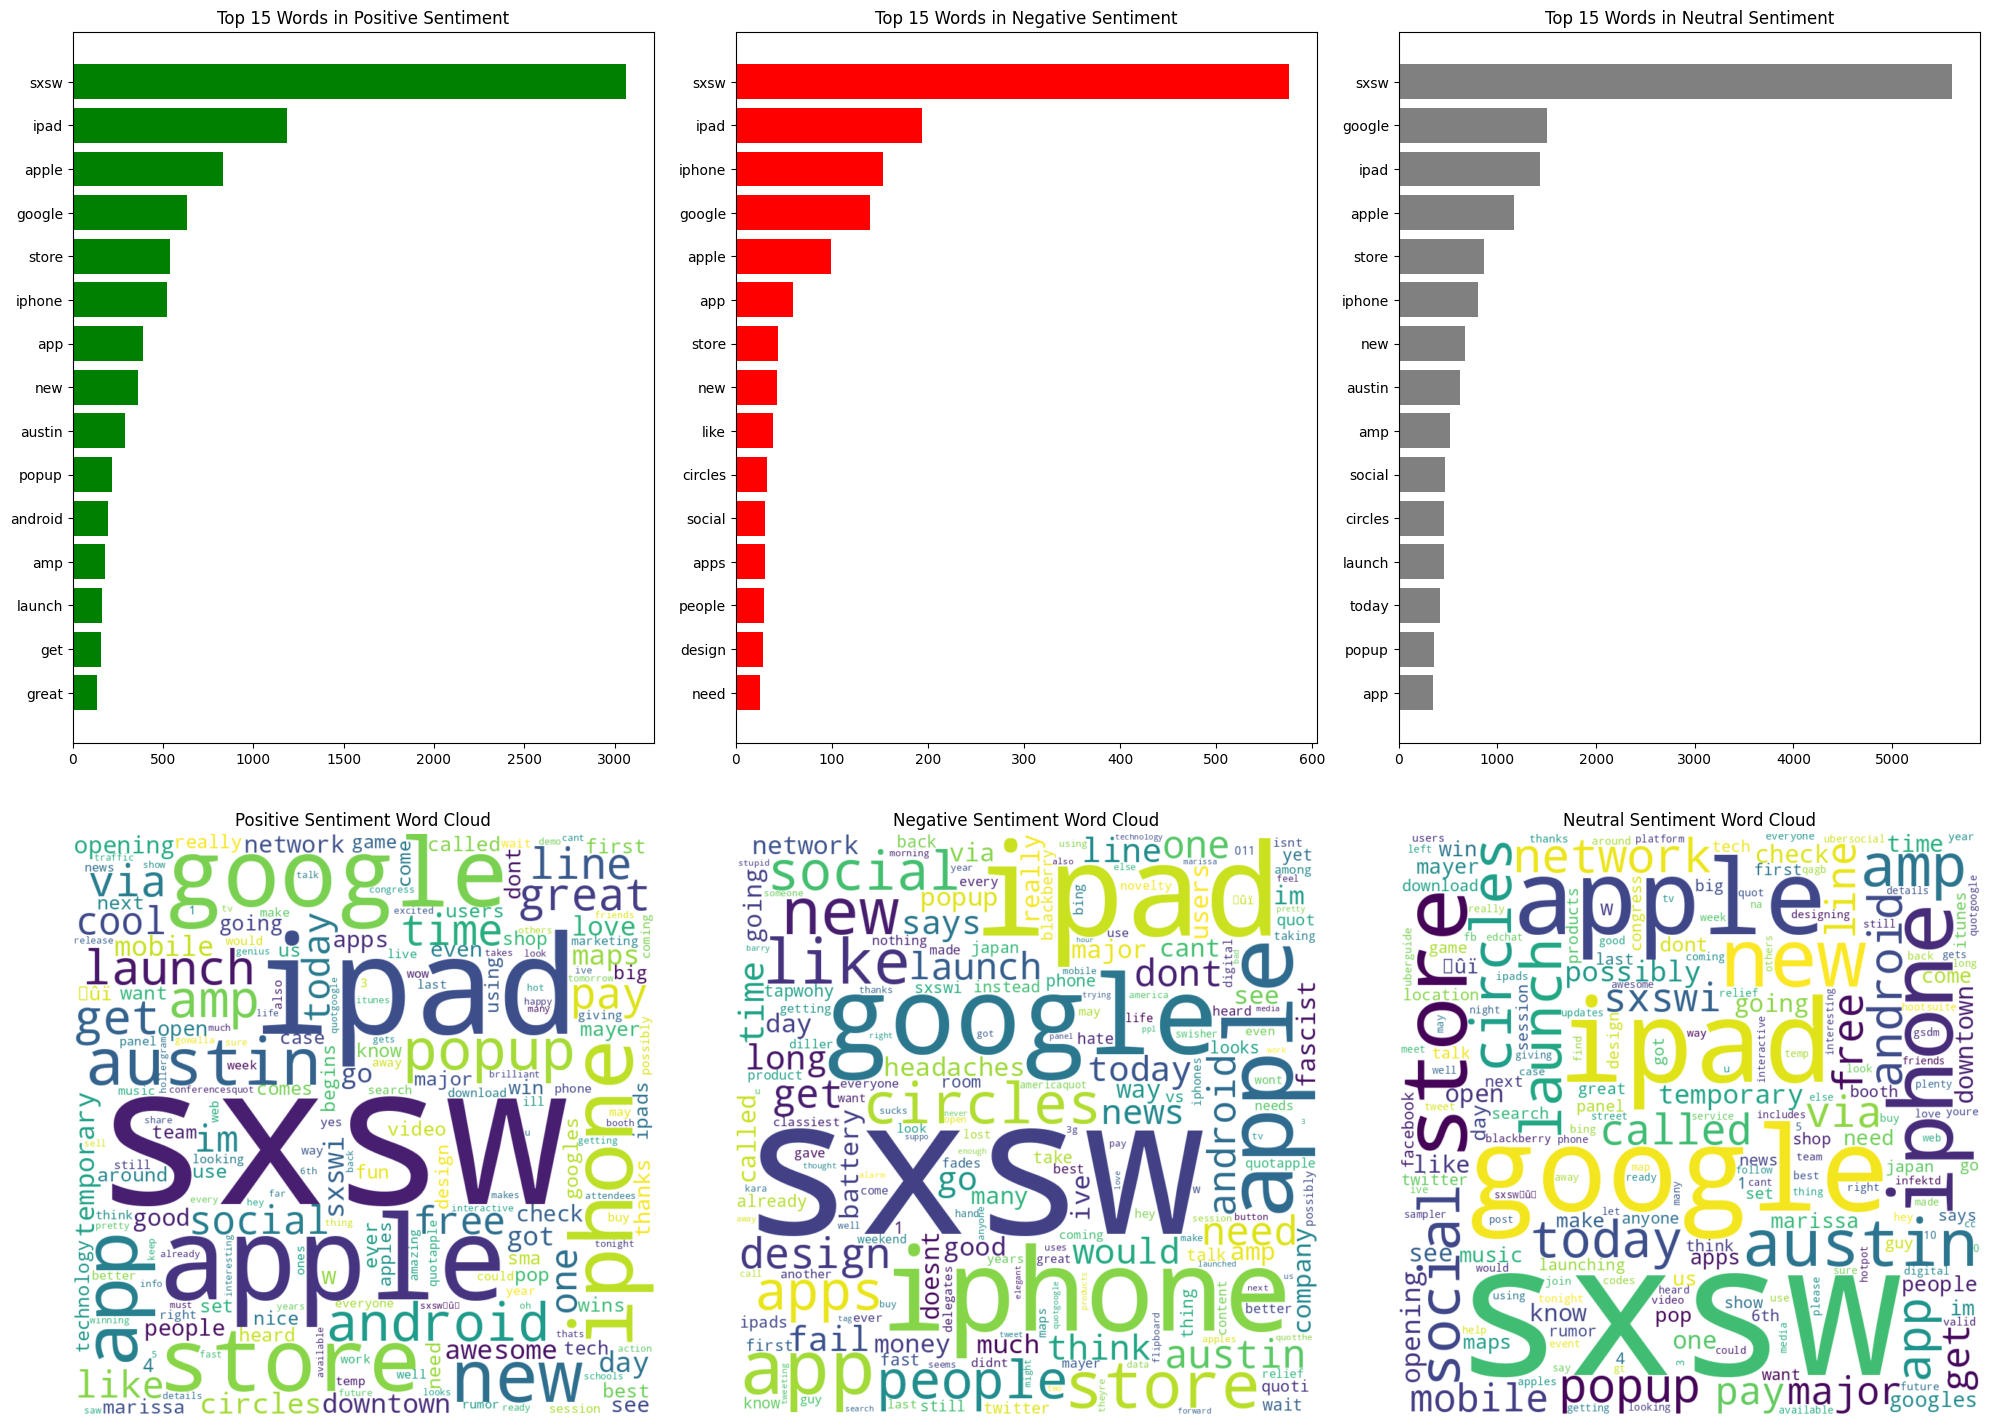

In [ ]:
from collections import Counter
from nltk.tokenize import word_tokenize

def preprocess_text(text, stopwords_list):
    # Convert to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove "mention", "link", "2", "rt"
    text = text.replace("mention", "").replace("link", "").replace("2", "").replace("rt", "")

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenize
    words = word_tokenize(text)

    # Remove stopwords
    words = [word for word in words if word not in stopwords_list]

    # Join the processed words back into a sentence
    processed_text = ' '.join(words)

    return processed_text

# Load NLTK stopwords
stopwords_list = set(stopwords.words('english'))

# create df2 for drawing word frequency plots
df2 = tweets_df.copy(deep=True)
df2['preprocessed_text'] = df2['tweet'].apply(lambda x: preprocess_text(x, stopwords_list))

# Separate preprocessed text for positive sentiment
positive_texts = df2[df2['sentiments'] == 'positive']['preprocessed_text']
positive_words = ' '.join(positive_texts).split()

# Separate preprocessed text for negative sentiment
negative_texts = df2[df2['sentiments'] == 'negative']['preprocessed_text']
negative_words = ' '.join(negative_texts).split()

# Separate preprocessed text for neutral sentiment
neutral_texts = df2[df2['sentiments'] == 'neutral']['preprocessed_text']
neutral_words = ' '.join(neutral_texts).split()

# Count word frequencies
positive_word_counts = Counter(positive_words)
negative_word_counts = Counter(negative_words)
neutral_word_counts = Counter(neutral_words)

# Get the top 15 words for each sentiment
top_positive_words = positive_word_counts.most_common(15)
top_negative_words = negative_word_counts.most_common(15)
top_neutral_words = neutral_word_counts.most_common(15)

# Extract words and frequencies for plotting
positive_words, positive_freq = zip(*top_positive_words)
negative_words, negative_freq = zip(*top_negative_words)
neutral_words, neutral_freq = zip(*top_neutral_words)

# Create plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 15))

# Plot positive sentiment word frequencies
axes[0, 0].barh(positive_words, positive_freq, color='green')
axes[0, 0].set_title('Top 15 Words in Positive Sentiment')
axes[0, 0].invert_yaxis()

# Plot negative sentiment word frequencies
axes[0, 1].barh(negative_words, negative_freq, color='red')
axes[0, 1].set_title('Top 15 Words in Negative Sentiment')
axes[0, 1].invert_yaxis()

# Plot neutral sentiment word frequencies
axes[0, 2].barh(neutral_words, neutral_freq, color='gray')
axes[0, 2].set_title('Top 15 Words in Neutral Sentiment')
axes[0, 2].invert_yaxis()

# Generate and display word clouds
wordcloud_positive = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(positive_word_counts)
wordcloud_negative = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(negative_word_counts)
wordcloud_neutral = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(neutral_word_counts)

axes[1, 0].imshow(wordcloud_positive, interpolation='bilinear')
axes[1, 0].set_title('Positive Sentiment Word Cloud')
axes[1, 0].axis('off')

axes[1, 1].imshow(wordcloud_negative, interpolation='bilinear')
axes[1, 1].set_title('Negative Sentiment Word Cloud')
axes[1, 1].axis('off')

axes[1, 2].imshow(wordcloud_neutral, interpolation='bilinear')
axes[1, 2].set_title('Neutral Sentiment Word Cloud')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
df2.sample()

,tweet,brand,sentiments,tweet_length,preprocessed_text
8198,spotted at #sxsw: man in need of an ipad (2?) ûò {link} #sxswi,apple,positive,63,spotted sxsw man need ipad ûò sxswi


# Modelling

### Label encode sentiments

In [ ]:
# Label encode sentiments
from sklearn.preprocessing import LabelEncoder

# LabelEncoder for sentiments
sentiment_encoder = LabelEncoder()
df2['sentiments_encoded'] = sentiment_encoder.fit_transform(df2['sentiments'])

# Display the mapping of encoded labels
sentiment_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))

print("Sentiment Mapping:", sentiment_mapping)

Sentiment Mapping: {'negative': 0, 'neutral': 1, 'positive': 2}


In [ ]:
df2.head()

,tweet,brand,sentiments,tweet_length,preprocessed_text,sentiments_encoded
0,".@wesley83 i have a 3g iphone. after 3 hrs tweeting at #rise_austin, it was dead! i need to upgrade. plugin stations at #sxsw.",apple,negative,127,wesley83 3g iphone 3 hrs tweeting riseaustin dead need upgrade plugin stations sxsw,0
1,"@jessedee know about @fludapp ? awesome ipad/iphone app that you'll likely appreciate for its design. also, they're giving free ts at #sxsw",apple,positive,139,jessedee know fludapp awesome ipadiphone app youll likely appreciate design also theyre giving free ts sxsw,2
2,@swonderlin can not wait for #ipad 2 also. they should sale them down at #sxsw.,apple,positive,79,swonderlin wait ipad also sale sxsw,2
3,@sxsw i hope this year's festival isn't as crashy as this year's iphone app. #sxsw,apple,negative,82,sxsw hope years festival isnt crashy years iphone app sxsw,0
4,"@sxtxstate great stuff on fri #sxsw: marissa mayer (google), tim o'reilly (tech books/conferences) &amp; matt mullenweg (wordpress)",google,positive,131,sxtxstate great stuff fri sxsw marissa mayer google tim oreilly tech booksconferences amp matt mullenweg wordpress,2


### Handling class Imbalance

The neutral tweets seem to be quite high in comparison to positive and negative tweets. Let's balance this to avoid our model being bias.

In [ ]:
df2['sentiments'].value_counts()

neutral     5372
positive    2968
negative     569
Name: sentiments, dtype: int64

In [ ]:
from sklearn.utils import resample
import pandas as pd

# Separate majority and minority classes
df_majority = df2[df2['sentiments_encoded'] == 1]
df_minority_0 = df2[df2['sentiments_encoded'] == 0]
df_minority_2 = df2[df2['sentiments_encoded'] == 2]

# Upsample the minority classes to match the majority class
df_minority_upsampled_0 = resample(df_minority_0, replace=True, n_samples=5360, random_state=42)
df_minority_upsampled_2 = resample(df_minority_2, replace=True, n_samples=5360, random_state=43)

# Combine the majority class with the upsampled minority classes
df_upsampled = pd.concat([df_majority, df_minority_upsampled_0, df_minority_upsampled_2]).reset_index(drop=True)

# Assuming X is your feature matrix
X_upsampled = df_upsampled.drop(columns=['sentiments_encoded'])

# Assuming y is your target variable
y_upsampled = df_upsampled['sentiments_encoded']

# Check the class distribution after oversampling
print(y_upsampled.value_counts())

1    5372
0    5360
2    5360
Name: sentiments_encoded, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

# Split the upsampled data into training, validation and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_upsampled['preprocessed_text'], y_upsampled, test_size=0.3, stratify=y_upsampled, random_state=42)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Check the class distribution in the training and testing sets
y_train.value_counts(), y_test.value_counts(), y_val.value_counts()

(1    3760
 0    3752
 2    3752
 Name: sentiments_encoded, dtype: int64,
 1    1612
 0    1608
 2    1608
 Name: sentiments_encoded, dtype: int64,
 0    795
 1    740
 2    718
 Name: sentiments_encoded, dtype: int64)

<img src="/NLP-project/img/1611422951583.jpg">

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the vectorizer on the training data
X_train_final = tfidf_vectorizer.fit_transform(X_train_final)

# Transform the testing data using the same vectorizer
X_val = tfidf_vectorizer.transform(X_val)

In [ ]:
print("X_train_final shape:", X_train_final.shape)
print("y_train_final shape:", y_train_final.shape)

X_train_final shape: (9011, 8427)
y_train_final shape: (9011,)


**Create a function to train validate our models**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
from xgboost import XGBClassifier  # Import XGBClassifier if needed
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

def train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, model, param_grid=None):

    if param_grid is not None:
        # Create the GridSearchCV object
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='roc_auc', verbose=1)
        grid_search.fit(X_train_final, y_train_final)
        # Use the best model from the grid search
        model = grid_search.best_estimator_

        # Print the best hyperparameters, best score, and best estimator
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        best_estimator = grid_search.best_estimator_
        print("Best Hyperparameters:", best_params)
        print("Best ROC-AUC Score:", best_score)
        print("Best Estimator:", best_estimator)

        # Fit the best model on the full training data
        model.fit(X_train_final, y_train_final)
    else:
        # If no hyperparameter tuning, simply fit the model on the training data
        model.fit(X_train_final, y_train_final)

    # Predictions on the training and test sets
    y_pred_train = model.predict(X_train_final)
    y_pred_val = model.predict(X_val)

    # # Calculate the ROC AUC score
    # train_roc_auc = roc_auc_score(y_train_final, y_pred_train)
    # test_roc_auc = roc_auc_score(y_val, y_pred_val)

    # # Print the ROC AUC score
    # print("Train ROC AUC Score:", train_roc_auc)
    # print("Test ROC AUC Score:", test_roc_auc)
    # print("\n")

    # Classification report for both train and test sets
    print("Classification Report (Training Set):")
    print(classification_report(y_train_final, y_pred_train))
    print("Classification Report (Test Set):")
    print(classification_report(y_val, y_pred_val))

    # Confusion matrix for both train and test sets
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    # Plot normalized confusion matrix for the training set
    ax1 = axes[0]
    cm_train = confusion_matrix(y_train_final, y_pred_train)
    cm_train_norm = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
    disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=np.unique(y_train_final))
    disp_train.plot(cmap=plt.cm.Blues, ax=ax1, values_format='.2f')
    ax1.set_title('Confusion Matrix (Training Set)')

    # Plot normalized confusion matrix for the val set
    ax2 = axes[1]
    cm_test = confusion_matrix(y_val, y_pred_val)
    cm_test_norm = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=np.unique(y_val))
    disp_test.plot(cmap=plt.cm.Blues, ax=ax2, values_format='.2f')
    ax2.set_title('Confusion Matrix (Test Set)')

    plt.tight_layout()
    plt.show()

    # Return the trained model
    return model

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2957
           1       0.86      0.84      0.85      3020
           2       0.87      0.85      0.86      3034

    accuracy                           0.89      9011
   macro avg       0.89      0.89      0.89      9011
weighted avg       0.89      0.89      0.89      9011

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       795
           1       0.75      0.70      0.72       740
           2       0.76      0.76      0.76       718

    accuracy                           0.81      2253
   macro avg       0.80      0.80      0.80      2253
weighted avg       0.80      0.81      0.81      2253



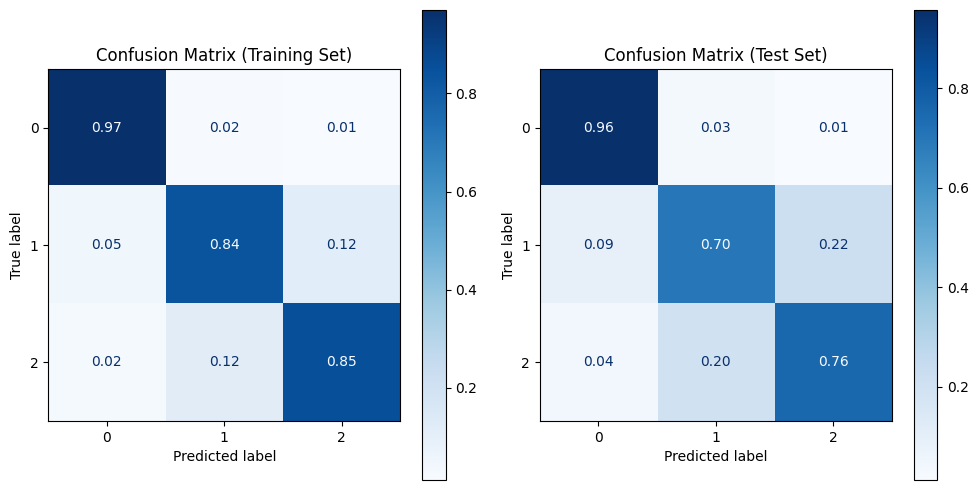

LogisticRegression(multi_class='ovr', random_state=42)

In [ ]:
# Instantiate the classifier
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, multi_class='ovr')

# Call the function with the classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, logreg)

In [ ]:
param_grid = {    'penalty': ['l1', 'l2'],
                  'C': [0.001, 0.01, 0.1, 1, 10, 100],
                  'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
                  'max_iter': [100, 200, 300]}

logreg_tuned = LogisticRegression(random_state=42, multi_class='ovr')

# Call the function with the classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, logreg_tuned, param_grid)

Fitting 3 folds for each of 180 candidates, totalling 540 fits


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      2957
           1       0.86      0.79      0.82      3020
           2       0.84      0.87      0.86      3034

    accuracy                           0.87      9011
   macro avg       0.87      0.87      0.87      9011
weighted avg       0.87      0.87      0.87      9011

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       795
           1       0.73      0.61      0.66       740
           2       0.73      0.78      0.75       718

    accuracy                           0.78      2253
   macro avg       0.77      0.77      0.77      2253
weighted avg       0.77      0.78      0.77      2253



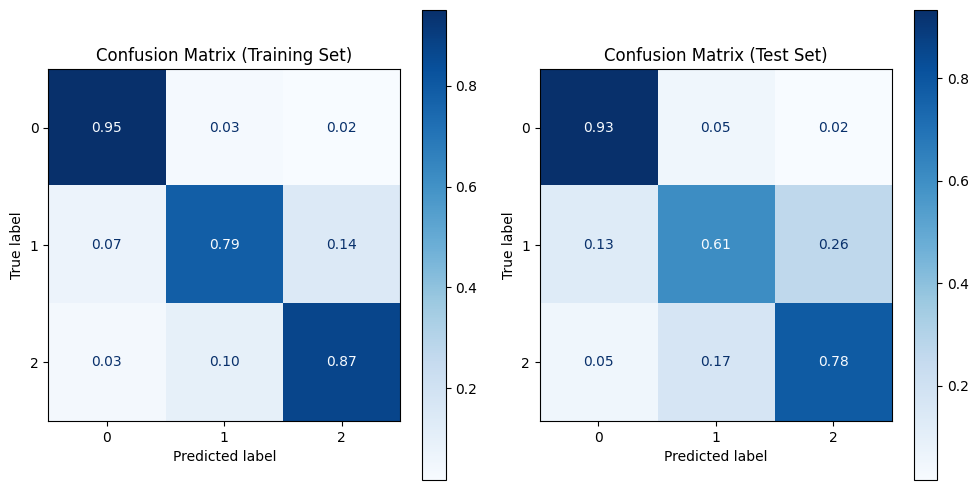

MultinomialNB()

In [ ]:
from sklearn.naive_bayes import MultinomialNB

# Initialize a Naive Bayes classifier
nb_classifier = MultinomialNB()

# Call the function with the Naive Bayes classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, nb_classifier)


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2957
           1       0.98      0.96      0.97      3020
           2       0.97      0.98      0.97      3034

    accuracy                           0.98      9011
   macro avg       0.98      0.98      0.98      9011
weighted avg       0.98      0.98      0.98      9011

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       795
           1       0.82      0.75      0.78       740
           2       0.78      0.84      0.81       718

    accuracy                           0.86      2253
   macro avg       0.86      0.86      0.86      2253
weighted avg       0.86      0.86      0.86      2253



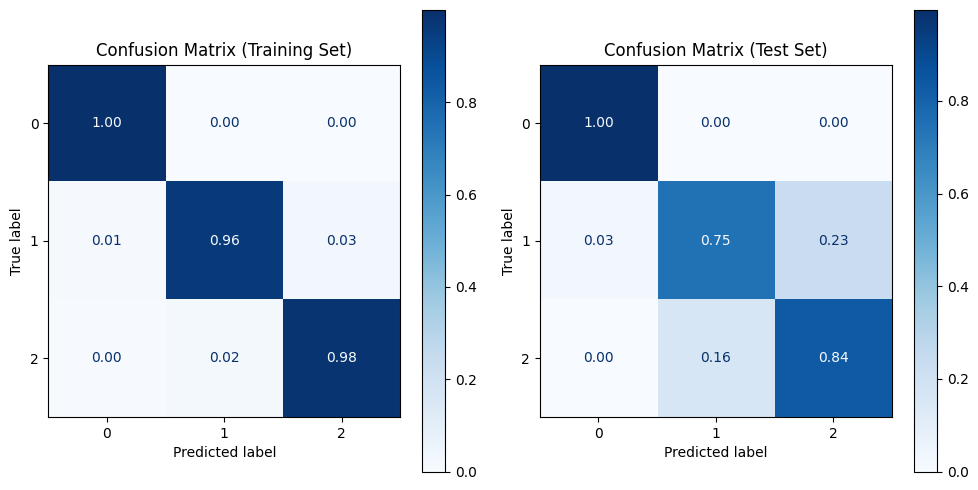

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Call the function with the Random Forest classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, rf_classifier)

Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2957
           1       0.94      0.95      0.94      3020
           2       0.96      0.94      0.95      3034

    accuracy                           0.96      9011
   macro avg       0.96      0.96      0.96      9011
weighted avg       0.96      0.96      0.96      9011

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       795
           1       0.81      0.80      0.81       740
           2       0.82      0.82      0.82       718

    accuracy                           0.87      2253
   macro avg       0.87      0.87      0.87      2253
weighted avg       0.87      0.87      0.87      2253



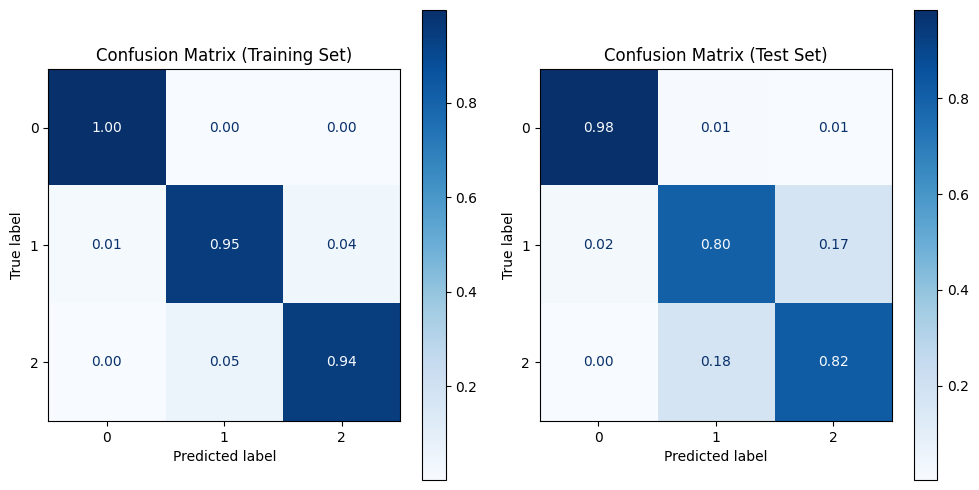

SVC(probability=True, random_state=42)

In [ ]:
from sklearn.svm import SVC

# Initialize a Support Vector Machine classifier
svm_classifier = SVC(random_state=42, probability=True)  # Make sure to set probability=True for ROC AUC scoring

# Call the function with the SVM classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, svm_classifier)


In [ ]:
# Instantiate the classifier
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, multi_class='ovr')

# Call the function with the classifier
train_and_evaluate_model(X_train_final, y_train_final, X_val, y_val, logreg, param_grid=True)